In [83]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Đổi thư mục,làm việc của Colab
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [86]:
# Tải dữ liệu
# Tải dữ liệu
train_df = pd.read_csv("train.tsv", sep='\t', header=None)
test_df = pd.read_csv("test.tsv", sep='\t', header=None)
val_df = pd.read_csv("valid.tsv", sep='\t', header=None)

In [87]:
def preprocess_text(text):
  # Chuyển chữ viết hoa thành viết thường
  text = text.lower()

  # Thay thế các ký tự không phải chữ cái, số hay khoảng trắng
  text = text.replace(r'[^\w\s]', '')
  return text


In [88]:
train_df[2] = train_df[2].apply(preprocess_text)
test_df[2] = test_df[2].apply(preprocess_text)
val_df[2] = val_df[2].apply(preprocess_text)

In [89]:
#tên nhãn
train_df[1].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [90]:
label_mapping = {
    'pants-fire':0,
    'false': 0,
    'barely-true':0,
    'half-true': 1,
    'mostly-true':1,
    'true': 1,


}

In [91]:
train_df[1] = train_df[1].map(label_mapping)
test_df[1] = test_df[1].map(label_mapping)
val_df[1] = val_df[1].map(label_mapping)

In [92]:
train_df[1].unique()

array([0, 1])

In [93]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,0,says the annies list political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,when did the decline of coal start? it started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"hillary clinton agrees with john mccain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,the economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [94]:
#y la nhan
train_texts=train_df[2].tolist()
val_texts=val_df[2].tolist()
test_texts=test_df[2].tolist()
y_train=train_df[1].tolist()
y_val=val_df[1].tolist()
y_test=test_df[1].tolist()

In [95]:
# Tạo TextVectorization để chuyển đổi văn bản thành các chỉ số
tokenizer = Tokenizer(num_words=20000)# Từ điển có 20000 từ

tokenizer.fit_on_texts(train_texts)# Train Tokenixer

# Chuyển text thành chuỗi số nguyên theo từ điển
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Padding de text co cung do dai
x_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=256)
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=256)
x_val = tf.keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=256)

In [96]:

# Khởi tạo mô hình
model = Sequential()

# Thêm lớp Embedding
model.add(Embedding(input_dim=20000, output_dim=8, input_length=256))

# Thêm lớp LSTM
model.add(LSTM(8, return_sequences=False))
model.add(Dropout(0.5))

# Thêm lớp Dense cho phân loại
model.add(Dense(1, activation='sigmoid'))  # 6 lớp phân loại
# Xây dựng và biên dịch mô hình

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [98]:
history = model.fit(
    tf.convert_to_tensor(x_train),
    tf.convert_to_tensor(y_train),
    epochs=10,
    batch_size=32,
    shuffle=True,
    callbacks=[early_stopping],
    validation_data=(tf.convert_to_tensor(x_val),tf.convert_to_tensor( y_val))
)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.5604 - loss: 0.6863 - val_accuracy: 0.5779 - val_loss: 0.6718
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.6300 - loss: 0.6484 - val_accuracy: 0.6145 - val_loss: 0.6583
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.7373 - loss: 0.5641 - val_accuracy: 0.5903 - val_loss: 0.7009
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.8005 - loss: 0.4698 - val_accuracy: 0.5888 - val_loss: 0.7469
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.8431 - loss: 0.4030 - val_accuracy: 0.5802 - val_loss: 0.8258


In [99]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(tf.convert_to_tensor(x_test), tf.convert_to_tensor(y_test))
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5853 - loss: 0.6596
Test Loss: 0.6542553305625916
Test Accuracy: 0.5982636213302612


In [100]:
from sklearn.metrics import confusion_matrix, classification_report

# Dự đoán trên tập kiểm tra
y_pred = model.predict(tf.convert_to_tensor(x_test))
y_pred_classes = [1 if p > 0.5 else 0 for p in y_pred]

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(cm)
from sklearn.preprocessing import LabelEncoder

# Báo cáo phân loại
cr = classification_report(y_test, y_pred_classes, target_names=['False', 'True'])
print('Classification Report:')
print(cr)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Confusion Matrix:
[[266 287]
 [222 492]]
Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.48      0.51       553
        True       0.63      0.69      0.66       714

    accuracy                           0.60      1267
   macro avg       0.59      0.59      0.59      1267
weighted avg       0.59      0.60      0.59      1267



In [101]:
import matplotlib.pyplot as plt

# Lưu các giá trị mất mát
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Lưu các giá trị độ chính xác (nếu cần)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby grants Licensee a nonexclusive, royalty-free, world-wide license
        to reproduce, analyze, test, perform and/or display publicly, prepare
        derivative works, distribute, and otherwise use matplotlib
        alone or in any derivative version, provided, however, that MDT's
        License Agreement and MDT's notice of copyright, i.e., "Copyright (c)

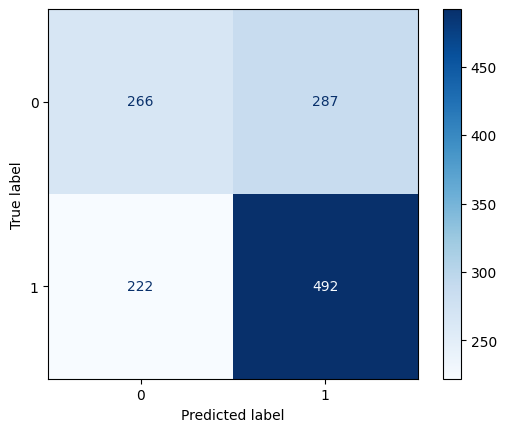

In [102]:
!pip install matplotlib --upgrade
# Check Matplotlib version
!pip show matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Vẽ Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.show()

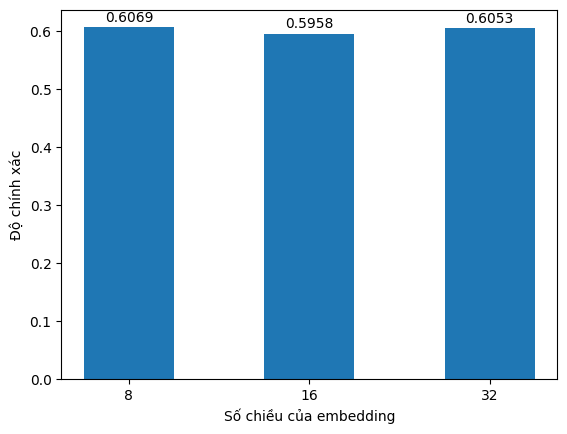

In [104]:
import matplotlib.pyplot as plt

# Dữ liệu mẫu
categories = ['8', '16', '32']
values = [0.6069, 0.5958, 0.6053]
# Vẽ đồ thị cột
plt.bar(categories, values, width=0.5)

# Thêm tiêu đề và nhãn trục
# plt.title('Biểu đồ so sánh độ chính xác trên tập test với số chiều của embedding khác nhau.')
plt.xlabel('Số chiều của embedding')
plt.ylabel('Độ chính xác')

for i in range(len(categories)):
    plt.text(i, values[i] + 0.01, f'{values[i]}', ha='center')

# Hiển thị đồ thị
plt.show()
